In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/naman/pgads/HeartDisease.csv')

In [3]:
data.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.tail()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
data.shape

(303, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [8]:
data.nunique()

age                     41
gender                   2
chest_pain               4
rest_bps                49
cholestrol             152
fasting_blood_sugar      2
rest_ecg                 3
thalach                 91
exer_angina              2
old_peak                40
slope                    3
ca                       5
thalassemia              4
target                   2
dtype: int64

In [9]:
data.describe()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Exploratory  Data Analysis

In [10]:
data.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [11]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x13ccf811c40>,
 [Text(-0.15765239109333648, 1.1189484901381985, 'Has Heart Diseases'),
  Text(0.1541646087803754, -1.0941929781348416, 'Has not Heart Diseases')],
 [Text(-0.08789469591929377, 0.623838538749615, '54.5%'),
  Text(0.08440686725079379, -0.5990830332774472, '45.5%')])

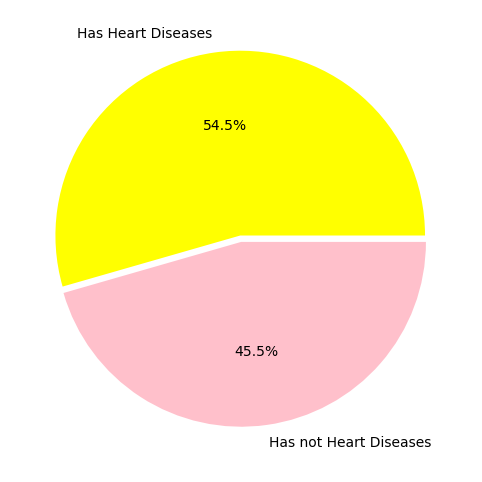

In [12]:
plt.figure(figsize=(10,6))
labels = ['Has Heart Diseases', 'Has not Heart Diseases']
explode = [0.03,0.005]
myColors = ['Yellow','Pink']
size = data.target.value_counts()
plt.pie(size, labels=labels, explode=explode, colors = myColors, autopct='%1.1f%%')

- From the given data we can notice that 54.5% people suffer from heart disease and 45.5% don't have Heart Disease

In [13]:
data.gender.value_counts()

1    207
0     96
Name: gender, dtype: int64

([<matplotlib.patches.Wedge at 0x13ccf872220>,
 [Text(-0.6149506526943384, 0.9480167164933366, 'Male'),
  Text(0.6013454629626003, -0.9270429516340094, 'Female')],
 [Text(-0.3428485939800293, 0.5285402932661964, '68.3%'),
  Text(0.3292434435225096, -0.5075665029308376, '31.7%')])

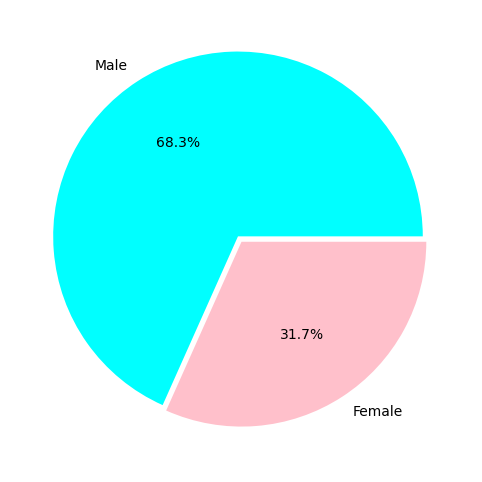

In [14]:
plt.figure(figsize=(10,6))
labels = ['Male', 'Female']
explode = [0.03,0.005]
myColors = ['aqua','Pink']
size = data.gender.value_counts()
plt.pie(size, labels=labels, explode=explode, colors = myColors, autopct='%1.1f%%')

<Axes: xlabel='slope', ylabel='count'>

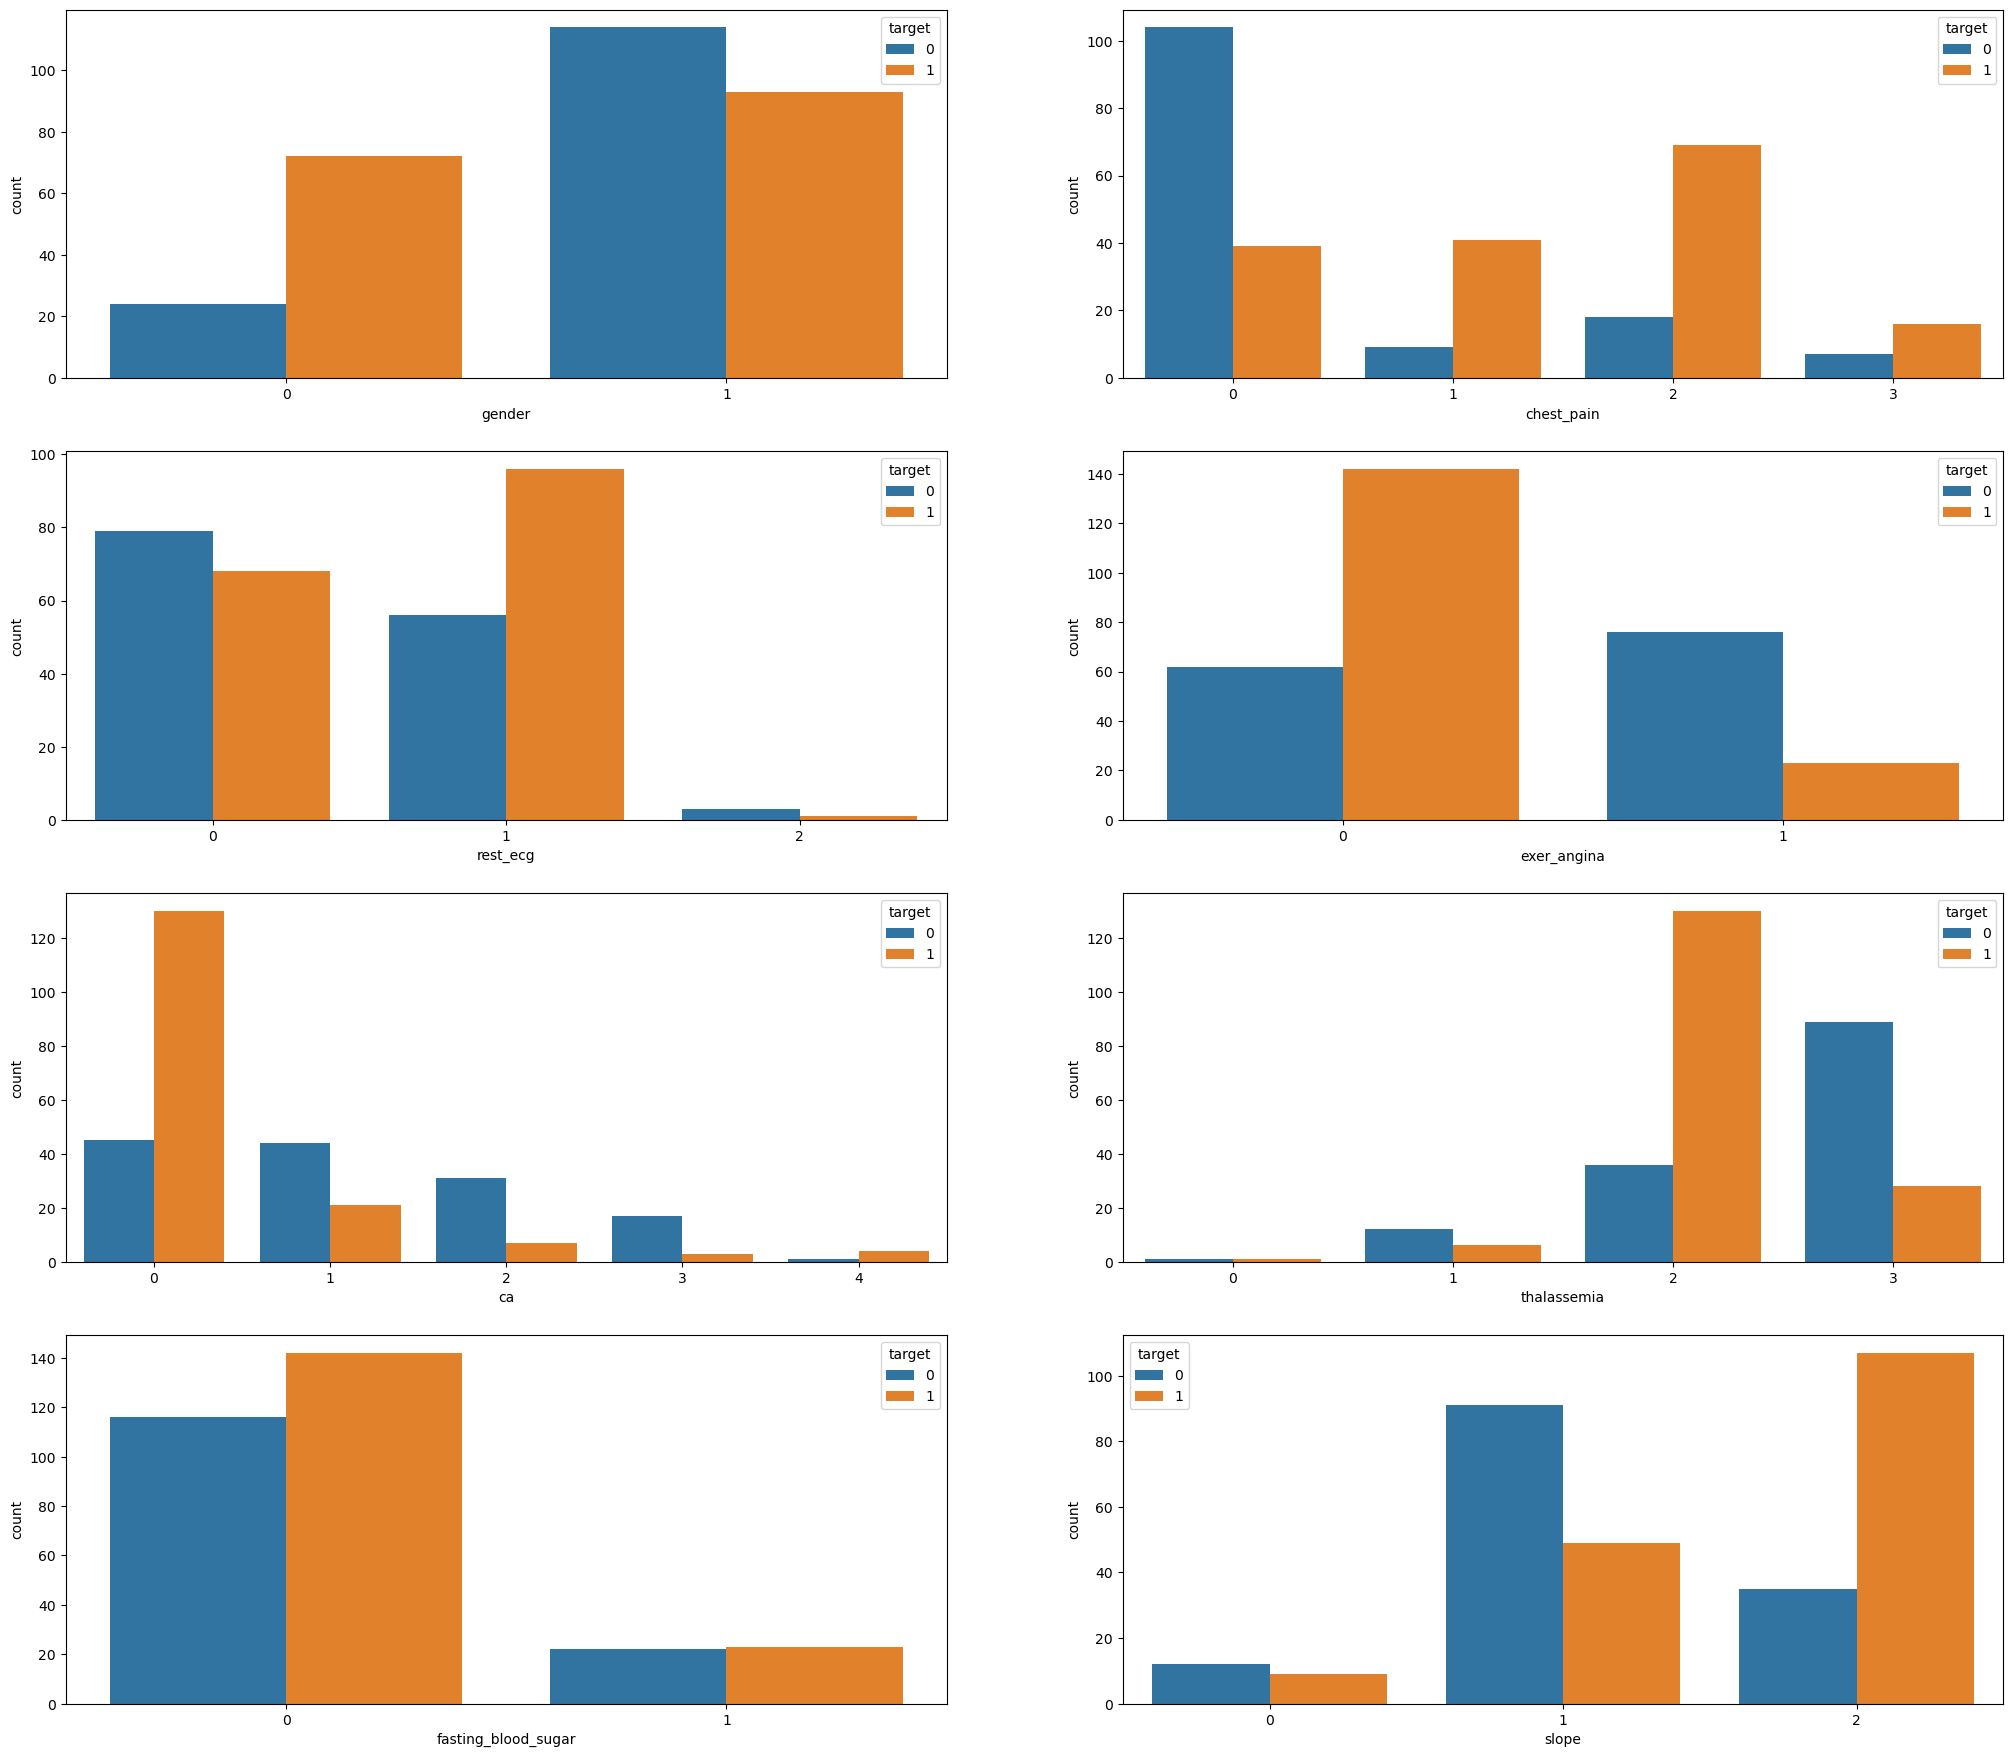

In [15]:
# checking for heart disease based on categorical data
fig, ax = plt.subplots(4,2, figsize=(25,22)) 
sns.countplot(x="gender", hue='target', data=data, ax=ax[0][0])
sns.countplot(x="chest_pain", hue='target', data=data, ax=ax[0][1])

sns.countplot(x="rest_ecg", hue='target', data=data, ax=ax[1][0])
sns.countplot(x="exer_angina", hue='target', data=data, ax=ax[1][1])

sns.countplot(x="ca", hue='target', data=data, ax=ax[2][0])
sns.countplot(x="thalassemia", hue='target', data=data, ax=ax[2][1])

sns.countplot(x="fasting_blood_sugar", hue='target', data=data, ax=ax[3][0])
sns.countplot(x="slope", hue='target', data=data, ax=ax[3][1])


In [16]:
data.head(1)

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


#### Insights
- People who are on 3rd level of chest pain are very less as compared to people who are on 2nd level of chest pain. Maybe most people died after 2nd level of chest pain.
- Rest ecg is 1 then person have more chances of suffering from Heart Disease and rest ecg 2 then person have least chances of heart disease.
- People having fps>135 is having more chance of heart disease than people having fps<120.
- Feature (the peak exercise ST segment slope) has three symbolic values (flat, up sloping, downsloping) Therefore People having up sloping are more prone to Heart Disease than flat and downsloping.

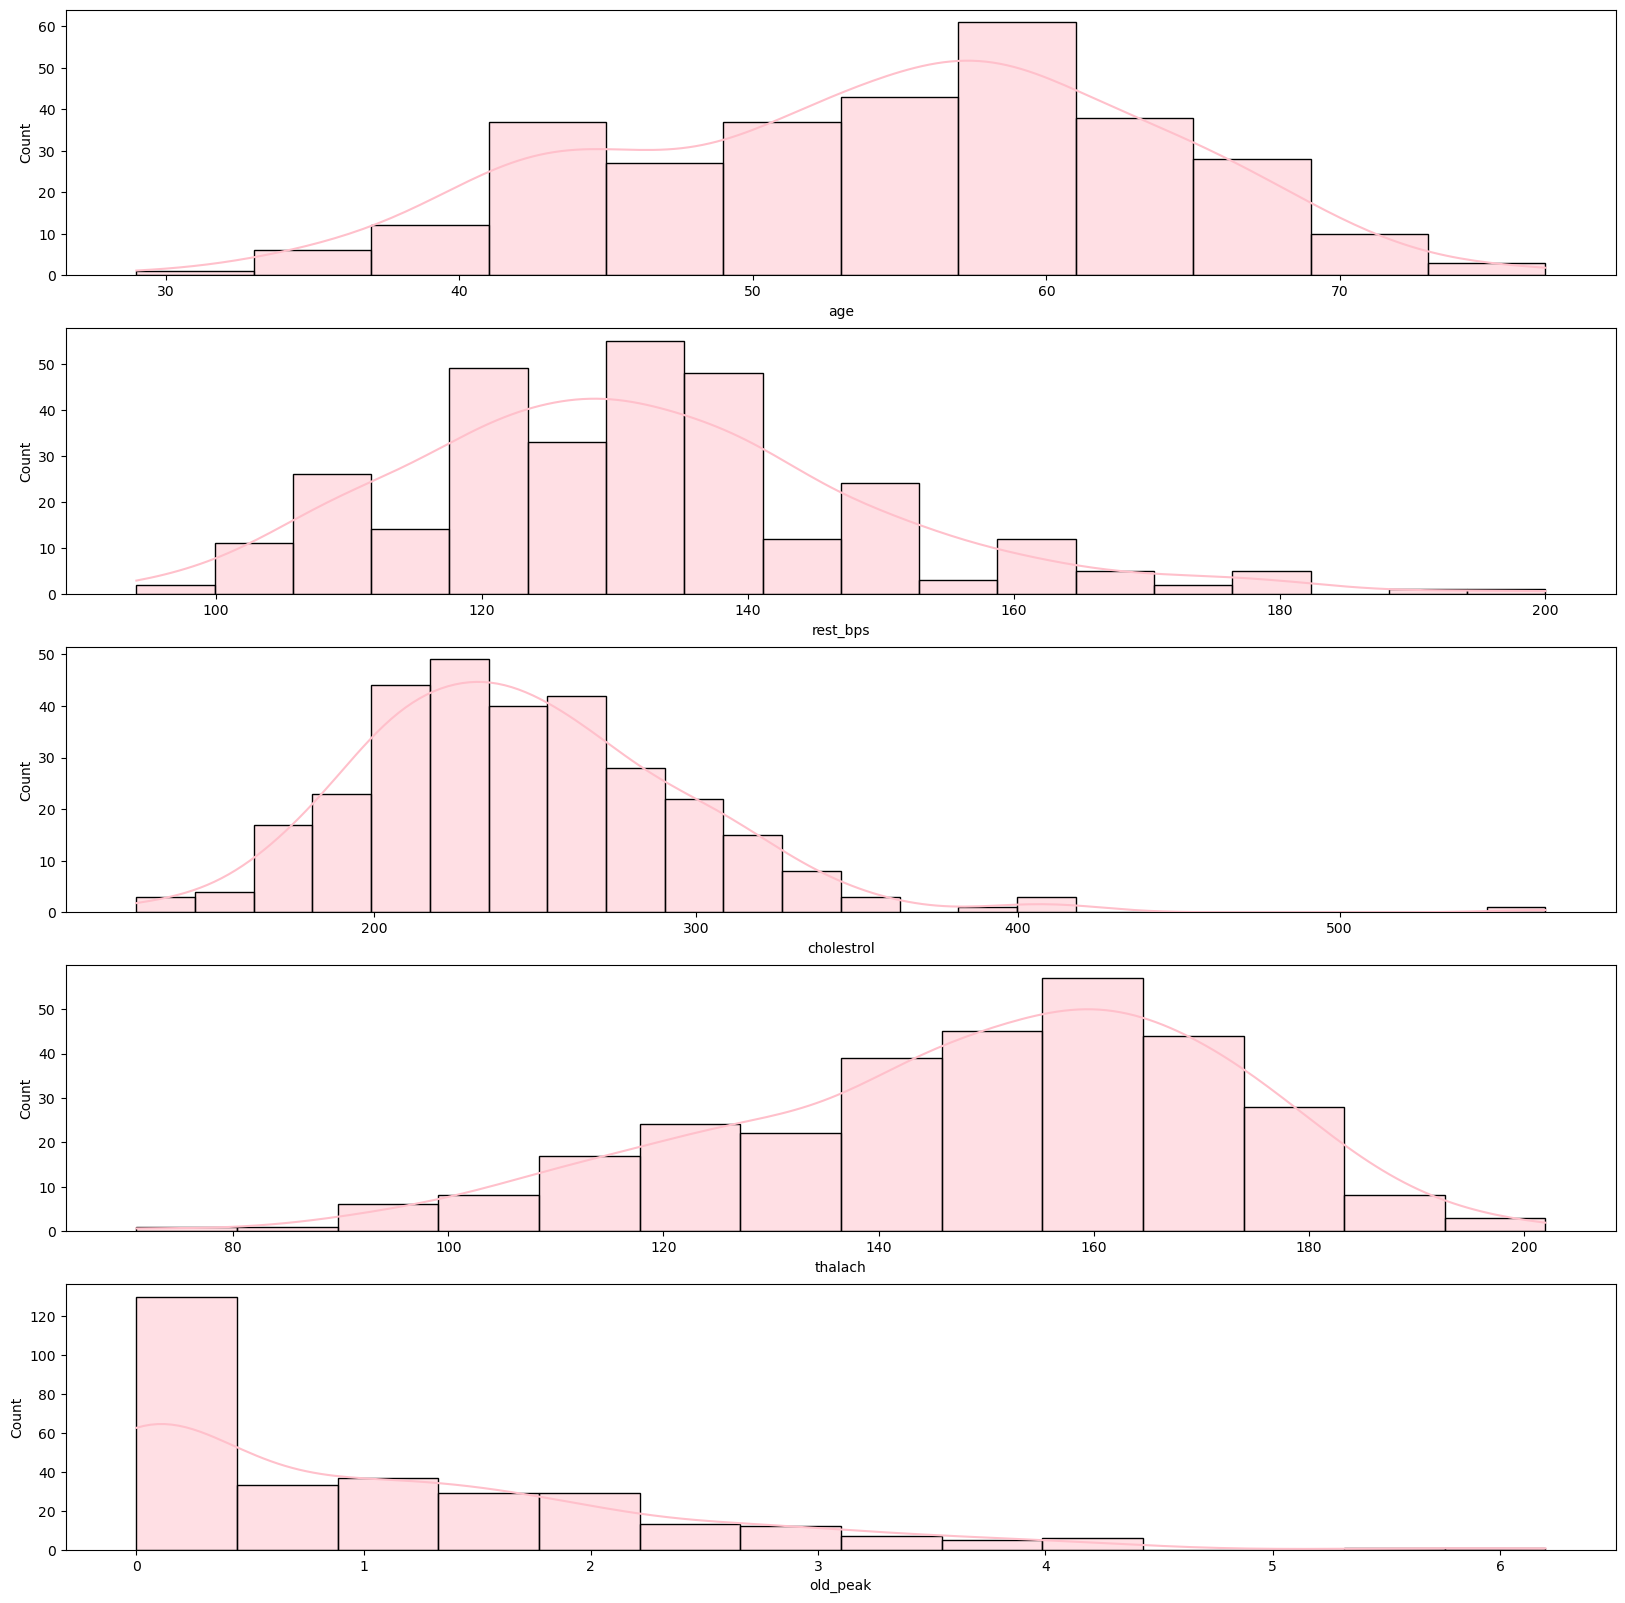

In [17]:
fig,axs=plt.subplots(5,1, figsize=(20,20))
plt1=sns.histplot(data['age'],bins='auto', kde=True,color='pink',ax=axs[0])
plt1=sns.histplot(data['rest_bps'],bins='auto', kde=True,color='pink', ax=axs[1])
plt1=sns.histplot(data['cholestrol'],bins='auto',kde=True,color='pink',ax=axs[2])
plt1=sns.histplot(data['thalach'],bins='auto',kde=True,color='pink',ax=axs[3])
plt1=sns.histplot(data['old_peak'],bins='auto', kde=True,color='pink',ax=axs[4])

plt.show()

In [18]:
# mean of numerical data
data_age = data.age.mean()
data_rest_bps = data.rest_bps.mean()
data_cholestrol = data.cholestrol.mean()
data_thalach = data.thalach.mean()
data_old_peak = data.old_peak.mean()

In [19]:
data_age,data_rest_bps,data_cholestrol,data_thalach,data_old_peak

(54.366336633663366,
 131.62376237623764,
 246.26402640264027,
 149.64686468646866,
 1.0396039603960396)

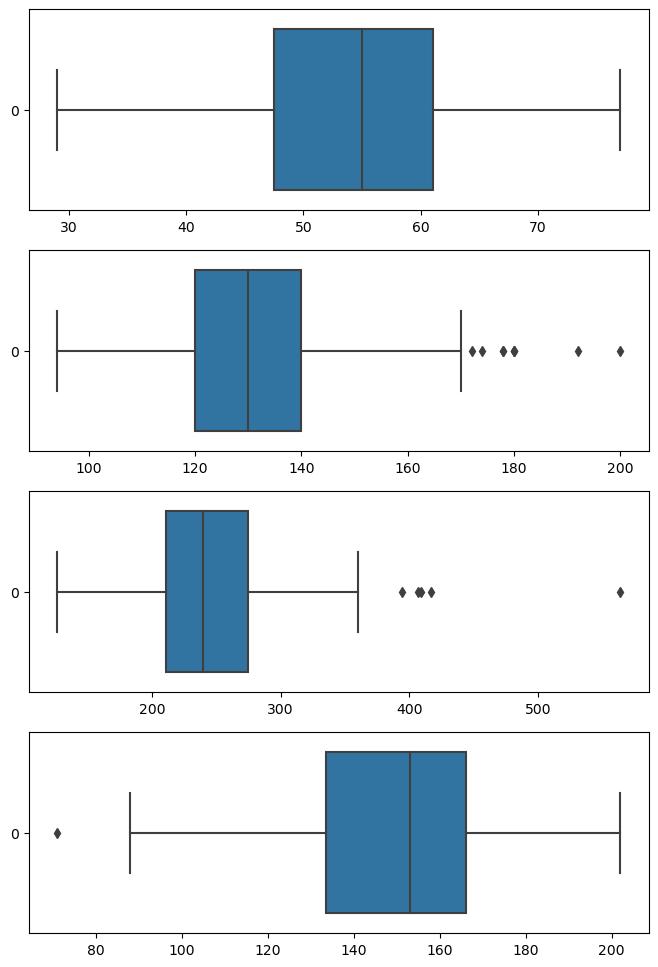

In [20]:
# outliers 
fig,axs=plt.subplots(4,1, figsize=(8,12))
plt1=sns.boxplot(data['age'],orient='h',ax=axs[0])
plt1=sns.boxplot(data['rest_bps'],orient='h',ax=axs[1])
plt1=sns.boxplot(data['cholestrol'],orient='h',ax=axs[2])
plt1=sns.boxplot(data['thalach'],orient='h',ax=axs[3])
plt.show()

### Feature Selection
##### chi2 test for independence (categorical data only)
- Null hypothesis: variables are independent to each other
- Alternate hypothesis: variables are dependent

In [21]:
from sklearn.feature_selection import chi2

In [22]:
x1 = data[['gender', 'chest_pain', 'rest_ecg', 'exer_angina', 'ca','thalassemia','fasting_blood_sugar','slope']]
y1 = data.target

In [23]:
# returns f score and p value
f_score = chi2(x1, y1)
f_score

(array([ 7.57683451, 62.59809791,  2.97827075, 38.91437697, 66.44076512,
         5.79185297,  0.20293368,  9.8040952 ]),
 array([5.91231763e-03, 2.53498179e-15, 8.43893904e-02, 4.42807388e-10,
        3.60567663e-16, 1.61006098e-02, 6.52363208e-01, 1.74123685e-03]))

In [24]:
p_value = pd.Series(f_score[1], index=x1.columns)
p_value

gender                 5.912318e-03
chest_pain             2.534982e-15
rest_ecg               8.438939e-02
exer_angina            4.428074e-10
ca                     3.605677e-16
thalassemia            1.610061e-02
fasting_blood_sugar    6.523632e-01
slope                  1.741237e-03
dtype: float64

In [25]:
irr_cols = []
for x in p_value.index:
    if p_value[x]<=0.05:
        print(x,':- Reject Null Hypothesis')
    else:
        print(x, ':- Accept Null Hypothesis')
        irr_cols.append(x)

gender :- Reject Null Hypothesis
chest_pain :- Reject Null Hypothesis
rest_ecg :- Accept Null Hypothesis
exer_angina :- Reject Null Hypothesis
ca :- Reject Null Hypothesis
thalassemia :- Reject Null Hypothesis
fasting_blood_sugar :- Accept Null Hypothesis
slope :- Reject Null Hypothesis


In [26]:
# dropping the irrevelant columns 
data.drop(irr_cols, axis=1, inplace=True)

In [27]:
data.head()

,age,gender,chest_pain,rest_bps,cholestrol,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,150,0,2.3,0,0,1,1
1,37,1,2,130,250,187,0,3.5,0,0,2,1
2,41,0,1,130,204,172,0,1.4,2,0,2,1
3,56,1,1,120,236,178,0,0.8,2,0,2,1
4,57,0,0,120,354,163,1,0.6,2,0,2,1


### Spliting the data

In [28]:
x = data.drop('target', axis=1) # feature
y = data['target']    # target

In [29]:
# split the data into train and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  = train_test_split(x,y, test_size=0.20, random_state=42)

In [30]:
x_train.shape, x_test.shape, y_test.shape, y_train.shape

((242, 11), (61, 11), (61,), (242,))

### Model Building

In [31]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [32]:
# Fit the training data
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [33]:
pred = dt.predict(x_test)
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

### Model Evalution

In [34]:
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, pred)*100
roc_auc_score = roc_auc_score(y_test, pred)*100
f1score = f1_score(y_test, pred)*100

print(f"Accuracy = {accuracy.round(4)}")
print(f"roc_auc_score = {roc_auc_score.round(4)}")
print(f"F1 Score = {f1score.round(4)}")

Accuracy = 83.6066
roc_auc_score = 83.8901
F1 Score = 83.3333


In [35]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



<Axes: >

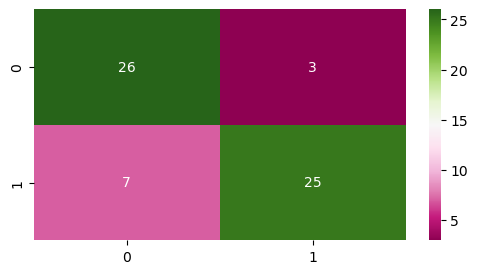

In [36]:
# ploting the confusion matrix
plt.figure(figsize=(6,3))
sns.heatmap(confusion_matrix(y_test,pred), annot=True, cmap='PiYG')